In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


## Import Data

In [2]:
n_classes = 10

def normalize_x(x):
    return x.astype(np.float32) / 255.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = normalize_x(x_train)
x_test = normalize_x(x_test)

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

## Architecture

In [6]:
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)

output_layer = Dense(n_classes, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## Train

In [8]:
learning_rate = .0005
optimizer = Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [9]:
model.fit(x=x_train, 
          y=y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True)

W0523 14:44:18.928122 4321379200 deprecation_wrapper.py:119] From /Users/comadan/venv/generative_deep_learning/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
50000/50000 [==============================] - 9s 173us/step - loss: 1.8445 - accuracy: 0.3345
Epoch 2/10
50000/50000 [==============================] - 8s 158us/step - loss: 1.6591 - accuracy: 0.4058
Epoch 3/10
50000/50000 [==============================] - 8s 151us/step - loss: 1.5857 - accuracy: 0.4364
Epoch 4/10
50000/50000 [==============================] - 8s 165us/step - loss: 1.5306 - accuracy: 0.4556
Epoch 5/10
50000/50000 [==============================] - 7s 149us/step - loss: 1.4926 - accuracy: 0.4692
Epoch 6/10
50000/50000 [==============================] - 7s 139us/step - loss: 1.4583 - accuracy: 0.4804
Epoch 7/10
50000/50000 [==============================] - 8s 159us/step - loss: 1.4352 - accuracy: 0.4889
Epoch 8/10
50000/50000 [==============================] - 8s 158us/step - loss: 1.4062 - accuracy: 0.5000
Epoch 9/10
50000/50000 [==============================] - 8s 159us/step - loss: 1.3826 - accuracy: 0.5032
Epoch 10/10
50000/50000 [=====================

### Evaluation

In [16]:
import matplotlib.pyplot as plt

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 85us/step


[1.4220910560607911, 0.4952999949455261]

In [11]:
model.fit(x=x_train, 
          y=y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 9s 190us/step - loss: 1.3392 - accuracy: 0.5212
Epoch 2/10
50000/50000 [==============================] - 8s 169us/step - loss: 1.3230 - accuracy: 0.5266
Epoch 3/10
50000/50000 [==============================] - 9s 172us/step - loss: 1.3082 - accuracy: 0.5324
Epoch 4/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.2896 - accuracy: 0.5423
Epoch 5/10
50000/50000 [==============================] - 8s 168us/step - loss: 1.2742 - accuracy: 0.5463
Epoch 6/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.2625 - accuracy: 0.5521
Epoch 7/10
50000/50000 [==============================] - 9s 175us/step - loss: 1.2456 - accuracy: 0.5565
Epoch 8/10
50000/50000 [==============================] - 9s 178us/step - loss: 1.2363 - accuracy: 0.5580
Epoch 9/10
50000/50000 [==============================] - 9s 171us/step - loss: 1.2214 - accuracy: 0.5634
Epoch 10/10
50000/50000 [=====================

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 57us/step


[1.4013627927780152, 0.5110999941825867]

---

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions_single = CLASSES[np.argmax(predictions, axis=-1)]
actuals_single = CLASSES[np.argmax(y_test, axis=-1)]

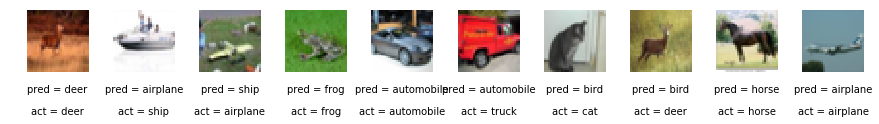

In [18]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(predictions_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actuals_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
